## Imports and Reading the Data
Dataset used is screentime_analysis_jan_2025<br>
URL: https://www.kaggle.com/datasets/flaviamonique/screetime-analysis-jan2025/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('screentime_analysis_jan_2025.csv')

## 1. Understanding Data

Applying operations like `Shape`, `Info`,`Describe` to understand the data present

In [3]:
df.shape
# Tells us the dimensions of the dataset

(240, 5)

In [4]:
df.describe()

,Usage (minutes),Notifications,Times Opened
count,240.000000,240.000000,240.000000
mean,160.616667,29.483333,21.670833
std,61.608113,39.311434,24.913322
min,13.000000,0.000000,1.000000
25%,120.000000,2.000000,4.750000
50%,142.000000,11.000000,11.000000
75%,210.750000,45.000000,30.000000
max,419.000000,147.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             240 non-null    object
 1   App              240 non-null    object
 2   Usage (minutes)  240 non-null    int64 
 3   Notifications    240 non-null    int64 
 4   Times Opened     240 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.5+ KB


In [6]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2025-01-01,Insta,120,11,38
1,2025-01-01,X,220,31,13
2,2025-01-01,WhatsA,126,65,89
3,2025-01-01,Telegram,60,5,14
4,2025-01-01,YouTube,120,2,10


In [7]:
df.dtypes

Date               object
App                object
Usage (minutes)     int64
Notifications       int64
Times Opened        int64
dtype: object

In [8]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

## Data preparation

- Dropping columns or rows which are not needed
- Finding duplicates

In [9]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

The dataset only has 5 Columns which makes it a small dataset and all of them can be used to gain insights<br>
<br>
Let's convert the date into pandas datetime type

In [10]:
df["Date"]=pd.to_datetime(df["Date"])

Check for Null values in the dataframe 

In [11]:
df.isna().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

isna() returns a dataframe with True for null values and False otherwise<br>
All sums being 0 indicate that there are no null values in the dataset which helps us not lose any data due to dropping rows with null values

In [12]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


## 3. Data Visualization 

In [13]:
df.head(20)

,Date,App,Usage (minutes),Notifications,Times Opened
0,2025-01-01,Insta,120,11,38
1,2025-01-01,X,220,31,13
2,2025-01-01,WhatsA,126,65,89
3,2025-01-01,Telegram,60,5,14
4,2025-01-01,YouTube,120,2,10
5,2025-01-01,Netflix,147,0,5
6,2025-01-01,Facebook,134,44,50
7,2025-01-01,LinkedIn,70,13,9
8,2025-01-02,Instagram,80,64,66
9,2025-01-02,Twiter,40,27,9


Analyzing Usage(minutes) to get to know which app is used the most.

In [14]:
classifi=df.groupby("App")["Usage (minutes)"].sum().reset_index().sort_values("Usage (minutes)",ascending=False)
classifi

,App,Usage (minutes)
0,Facebook,5331
10,YouTube,4849
5,Telegram,4770
8,WhatsApp,4694
2,Instagram,4637
4,Netflix,4548
3,LinkedIn,4368
9,X,3900
7,WhatsA,532
1,Insta,483


`Facebook` is the most used app among the apps listed in the dataset

Let's see the distribution of the usage of the apps.

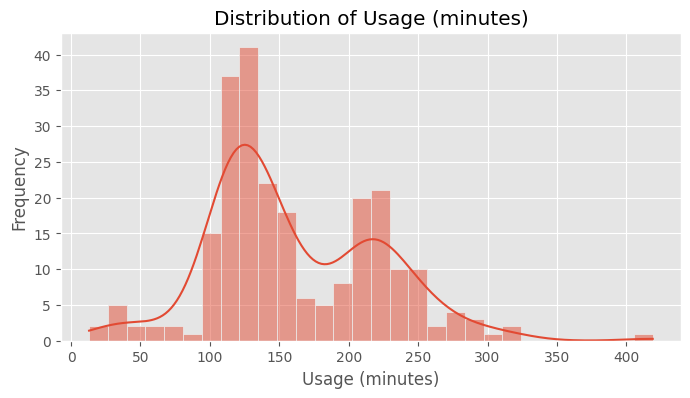

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Usage (minutes)'], kde=True, bins=30) # kde is the curve representing the distribution
plt.title(f'Distribution of Usage (minutes)')
plt.xlabel('Usage (minutes)')
plt.ylabel('Frequency')
plt.show()

From the graph we can see that the distribution of usage has 2 peaks which is like a bimodal distribution.<br>
It can be said that the most usage is between 100-150 minutes, with the next major group lying between 200-250 minutes.<br>
<br>
<br>
Assuming that the usage time and the number of times a certain time is related. Plot a graph to check for correlation between number of times the app is opened and screen time.

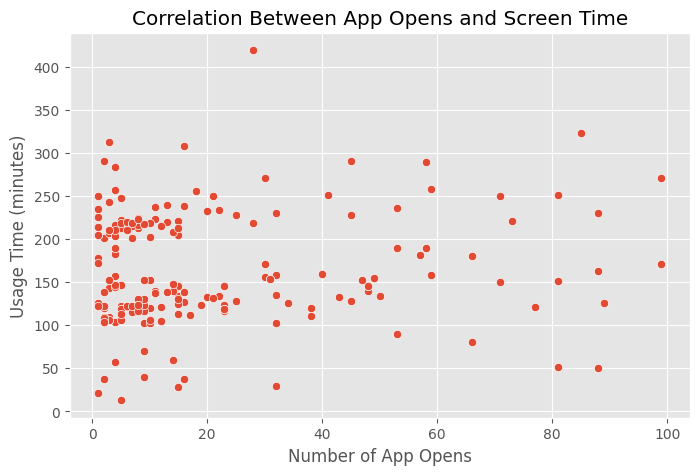

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Times Opened', y='Usage (minutes)')
plt.title('Correlation Between App Opens and Screen Time')
plt.xlabel('Number of App Opens')
plt.ylabel('Usage Time (minutes)')
plt.grid(True)
plt.show()

In [17]:
#Finding correlation coefficient between them
correlation = df['Times Opened'].corr(df['Usage (minutes)'])
print(f"Correlation coefficient: {correlation:.2f}")


Correlation coefficient: 0.14


It can be seen that the two features have a Weak positive correlation coefficient of 0.14 which means that the usage and number of times the app is opened is not related as much as we thought.<br><br><br>
Check the effect of notifications on usage time.

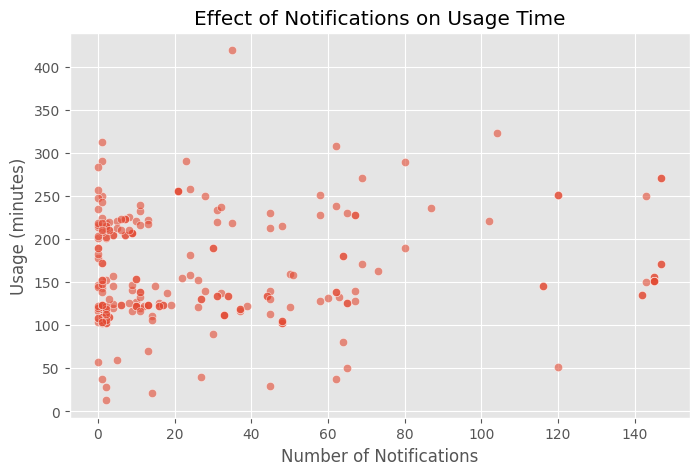

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Notifications', y='Usage (minutes)', alpha=0.6)
plt.title('Effect of Notifications on Usage Time')
plt.xlabel('Number of Notifications')
plt.ylabel('Usage (minutes)')
plt.grid(True)
plt.show()

There is no clear trend to notice here but we can see that people who get more notification show usage around the average value (160 as seen in describe function result) usage.